# Objectives of EDA

To help new restaurants in deciding their theme, facilities, cuisine, cost etc. for a particular location. This dataset also contains votes for each of the restaurant which will help in finding overall rating for the place.

# Data Definition

**url:** Contains the url of the restaurant in the zomato website

**address:** Contains the address of the restaurant in Bangalore

**name:** Contains the name of the restaurant

**online_order**: Whether online ordering is available in the restaurant or not

**book_table:** Table booking option available or not

**rate:** Contains the overall rating of the restaurant out of 5

**votes:** Contains total number of rating for the restaurant as of the above mentioned date

**phone:** Contains the phone number of the restaurant

**location:** Contains the neighborhood in which the restaurant is located

**rest_type:** Restaurant type

**dish_liked:** Dishes people liked in the restaurant

**cuisines:** Food styles, separated by comma

**approx_cost(for two people):** Contains the approximate cost for meal for two people

**reviews_list:** List of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer

**menu_item:** Contains list of menus available in the restaurant

**listed_in(type):** Type of service

# Table of Contents

1. **[Importing Important Libraries](#import_lib)**
2. **[Loading Dataset](#load_data)**
3. **[Observation of the dataset](#observation)**
4. **[Removing duplicate values from the dataset](#duplicate_value)**
5. **[Cleaning Data](#cleaning_data)**
    - 5.1 - [`Rate` column](#rate_column)
        - 5.1.1 - [Removing NEW, -, and /5 from `rate` column](#rate_column_remove)
        - 5.1.2 - [Replacing 'Null' values in `rate` column with its mean](#rate_column_replace)
    - 5.2 - [Dropping Null values from other columns](#drop_null)
    - 5.3 - [Chi-square test of independence to analyze relationship between `location` and `City`](#chi_sq)
    - 5.4 - [`location` column](#location)
    - 5.5 - [`Cost_for_two` column](#cost_for_two)
    - 5.6 - [`rest_type` column](#rest_type)
    - 5.7 - [`cuisines` column](#cuisines)
    - 5.8 - [`Type_of_service` column](#Type_of_service)
6. **[Summary Statistics](#summary_stats)**
    - 6.1 - [Numerical variables](#num_var)
    - 6.2 - [Categorical variables](#cat_var)
7. **[Discovering Outliers](#outliers)**
    - 7.1 - [Bifurcating dataset into two different datasets (numeric and categorical)](#outliers_bifurcate)
    - 7.2 - [Plotting boxplot for numerical data](#outliers_boxplot)
    - 7.3 - [Removing outliers using IQR method](#remove_outliers)
8. **[Checking cleaned data](#clean_data_check)**
    - 8.1 - [Checking correlation between features](#correlation)
    - 8.2 - [Checking multicollinearity between features](#multicollinearity)
9. **[Visualizations](#visualization)**
    - 9.1 - [Univariate Analysis](#univariate)
        - 9.1.1 - [Visualizing `Locations`](#visualize_locations)
        - 9.1.2 - [Visualizing `online_order`](#visualize_online_order)
        - 9.1.3 - [Visualizing `book_table`](#visualize_book_table)
        - 9.1.4 - [Visualizing `cuisines`](#visualize_cuisines)
        - 9.1.5 - [Visualizing `rate`](#visualize_rate)
        - 9.1.6 - [Visualizing `Type_of_service`](#visualize_Type_of_service)
        - 9.1.7 - [Visualizing `Cost_for_two`](#visualize_Cost_for_two)
    - 9.2 - [Bivariate Analysis](#bivariate)
        - 9.2.1 - [Visualizing `online_order` v/s `rate`](#visualize_online_order_rate)
        - 9.2.2 - [Visualizing `book_table` v/s `rate`](#visualize_book_table_rate)
        - 9.2.3 - [Visualizing `Type_of_service` vs `rate`](#visualize_type_of_service_rate)
        - 9.2.4 - [Visualizing `Cost_for_two` v/s `votes` v/s `rate` using pair plot](#visualize_three)
    - 9.3 - [Visualizing correlation between features](#visualize_correlation)
10. **[Analysis](#analysis)**
    - 10.1 - [How many restaurants have online ordering facility in each location?](#analysis_1)
    - 10.2 - [How many restaurants have table booking facility in each location?](#analysis_2)
    - 10.3 - [Grouping different type of restaurants location wise](#analysis_3)
    - 10.4 - [Finding no. of votes location wise](#analysis_4)
    - 10.5 - [Finding no. of votes cuisines wise](#analysis_5)
11. **[Inferences and Conclusion](#conclusion)**

<a id='import_lib'></a>
# 1. Importing Important Libraries

In [533]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.offline as py
from plotly.offline import iplot

from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

These are the libraries which I am using for EDA and visualization:-

**Pandas:** A software library written for the Python programming language for data manipulation and analysis.

**Numpy:** A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Matplotlib:** A plotting library for the Python programming language and its numerical mathematics extension NumPy.

**Seaborn:** A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Plotly:** Used to create interactive visualizations and plots

**Statsmodels:** It is used for statistical modeling and analysis, including regression, time series analysis, and hypothesis testing.

<a id='load_data'></a>
# 2. Loading Dataset

In [534]:
# Loading dataset

df = pd.read_csv("zomato (Bangalore).csv")

In [535]:
# Displaying the first 5 rows rows in the dataset

df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [536]:
df.shape

(51717, 17)

**Observation:**

We can see that there are 51717 rows and 17 columns.

In [537]:
# Displaying the names of the columns in a dataset

df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [538]:
# Displaying information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**Observation:**

We can see that there are few features with some null values like **'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines'** and **'approx_cost(for two people)'**

Here we can see only one feature which has **int** datatype. Features such as **'rate'** and **'approx_cost(for two people)'** are recognised as **object** data type as they have null values in them.

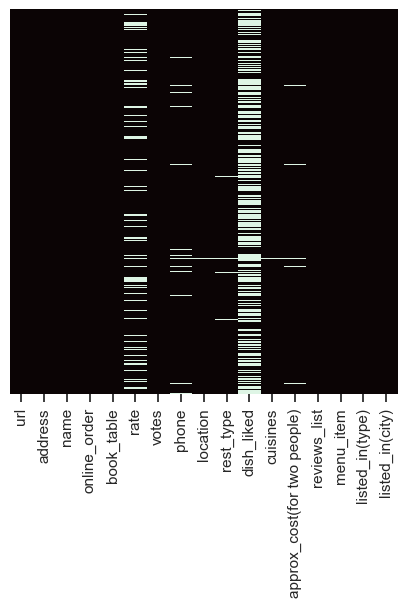

In [539]:
# Plotting missing data

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'mako');

In [540]:
# Displaying missing data

Total = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
dish_liked,28078,54.291626
rate,7775,15.033741
phone,1208,2.335789
approx_cost(for two people),346,0.669026
rest_type,227,0.438927
cuisines,45,0.087012
location,21,0.040606
listed_in(type),0,0.000000
menu_item,0,0.000000
reviews_list,0,0.000000


<a id='observation'></a>
# 3. Observation of the dataset

We can see that the column **'dish_liked'** has more than 50% missing values so we will be dropping it.

Column **'rate'** has approximately 15% missing values. We will be making necessary changes to this column and will be **replacing the missing values with its mean**.

Also, columns like **'url', 'address', 'phone', 'reviews_list'** and **'menu_item'** are of no use for gaining insights in this EDA so we will drop those as well.

#### Dropping columns

In [541]:
df = df.drop(['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], axis=1)

#### Renaming columns

In [542]:
df = df.rename(columns = {'approx_cost(for two people)':'Cost_for_two','listed_in(type)':'Type_of_service', 'listed_in(city)': 'City'})
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_two,Type_of_service,City
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [543]:
# Displaying shape of the modified dataset

df.shape

(51717, 11)

<a id='duplicate_value'></a>
# 4. Removing duplicate values from the dataset

In [544]:
# Displaying all the duplicate values

df[df.duplicated()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_two,Type_of_service,City
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out,Bannerghatta Road
3763,The Fisherman's Wharf,Yes,Yes,4.4/5,4099,Sarjapur Road,"Casual Dining, Bar","Seafood, Goan, North Indian, Continental, Asian","1,400",Buffet,Bellandur
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,Delivery,Bellandur
4949,OPUS Club,No,Yes,4.4/5,1496,Sarjapur Road,Pub,"Continental, Italian, North Indian, Mexican","1,900",Drinks & nightlife,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,"Juices, Fast Food",200,Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,Delivery,Sarjapur Road
50379,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,Desserts,200,Delivery,Whitefield
50405,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,Desserts,200,Delivery,Whitefield


**Observation:**

Here we can see that there are **108 rows** which have duplicate data.

Since duplicate data doesn't add any additional information and just increases the processing time, it is preferrable to drop these duplicate rows.

In [545]:
# Displaying shape of the dataset before dropping duplicate rows

print("Total no. rows and columns before dropping duplicate rows:", df.shape)


# Dropping duplicate rows

df.drop_duplicates(inplace = True)


# Displaying shape of the dataset after dropping duplicate rows

print("Total no. rows and columns after dropping duplicate rows:", df.shape)

Total no. rows and columns before dropping duplicate rows: (51717, 11)
Total no. rows and columns after dropping duplicate rows: (51609, 11)


<a id='cleaning_data'></a>
# 5. Cleaning Data

<a id='rate_column'></a>
## 5.1 `Rate` column

In [546]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**Observation:**

Here we can see the ratings as **'4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '-'**

1. Rating written as **4.3/5** might cause issues while doing calculations. In order to avoid that we need to change the ratings just to **4.3** by removing **/5**.

2. We can observe unique elements **'NEW'** and **'-'** in the column.

3. We will now write a function to change those values to **'nan'** and also transform all the ratings into **float** datatype.

<a id='rate_column_remove'></a>
### 5.1.1 Removing 'NEW', '-', and '/5' from `rate` column

#### Checking total no. of newly opened restaurants

In [547]:
df[df['rate'] == 'NEW']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_two,Type_of_service,City
72,Spicy Tandoor,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150,Delivery,Banashankari
75,Om Sri Vinayaka Chats,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari
110,Hari Super Sandwich,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200,Delivery,Banashankari
130,Roll Magic Fast Food,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200,Delivery,Banashankari
131,Foodlieious Multi Cuisine,No,No,NEW,0,Banashankari,Quick Bites,North Indian,100,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51585,Wow Tiffin Food,No,No,NEW,0,Whitefield,Quick Bites,North Indian,200,Dine-out,Whitefield
51586,Quick Bites,Yes,No,NEW,0,Whitefield,Quick Bites,Chinese,200,Dine-out,Whitefield
51603,Shiv sagar,Yes,No,NEW,0,Whitefield,"Quick Bites, Food Court","South Indian, Chinese, North Indian",250,Dine-out,Whitefield
51604,Nawab Di Biryani,No,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,Dine-out,Whitefield


#### Creating a function to handle the 'NEW', '-' values and also to remove '/5' from the `rate` column

In [548]:
def handle_rate(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

#### Calling the above function

In [549]:
df['rate'] = df['rate'].apply(handle_rate)
df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

#### Checking the total count of 'Null' values in `rate` column

In [550]:
df.rate.isnull().sum()

10019

<a id='rate_column_replace'></a>
### 5.1.2 Replacing 'Null' values in `rate` column with its mean

In [551]:
df['rate'].fillna(df['rate'].mean(), inplace = True)

#### Rechecking the total count of 'Null' values in `rate` column after replacing with mean

In [552]:
df['rate'].isnull().sum()

0

#### Checking information of the dataset after making the above changes

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   location         51588 non-null  object 
 6   rest_type        51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   Cost_for_two     51265 non-null  object 
 9   Type_of_service  51609 non-null  object 
 10  City             51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


**Observation:**

Null values have been replaced and the data type for **'rate'** column has changed to **float**.

<a id='drop_null'></a>
## 5.2 Dropping Null values from other columns

#### Checking count of null values before dropping them

In [554]:
df.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location            21
rest_type          227
cuisines            45
Cost_for_two       344
Type_of_service      0
City                 0
dtype: int64

**Observation:**

Here we can see that there some 'Null' values in the columns **'location', 'rest_type', 'cuisines'** and **'approx_cost(for two people)'**. Since the count of 'Null' values is insignificant compared to the total no. of rows in the dataset we can drop these rows.

#### Dropping null values

In [555]:
df.dropna(inplace = True)

#### Rechecking count of null values after dropping them

In [556]:
df.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
Cost_for_two       0
Type_of_service    0
City               0
dtype: int64

**Observation:**

Rows having 'Null' values have been deleted.

#### Checking shape of the dataset after treating all the null values

In [557]:
df.shape

(51042, 11)

<a id='chi_sq'></a>
## 5.3 Chi-square test of independence to analyze relationship between `location` and `City`

#### Checking unique values in the `location` column

In [558]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

#### Checking unique values in the `City` column

In [559]:
df.City.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

#### Checking correlation between columns `location` and `City`

**Hypothesis:**

H0: **`location`** and **`City`** columns are independent

H1: **`location`** and **`City`** columns are dependent

In [560]:
# Creating a contingency table

contingency_table = pd.crosstab(df.location, df.City)
contingency_table

City,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
location,,,,,,,,,,,,,,,,,,,,,
BTM,1114,0,260,30,1,2,1,0,0,1,...,2,2,0,1,0,1,0,1,1,0
Banashankari,1,484,0,275,1,1,0,2,0,1,...,1,1,0,0,0,0,0,1,0,0
Banaswadi,0,0,0,0,0,0,0,0,0,44,...,0,0,0,0,0,0,0,0,0,0
Bannerghatta Road,251,0,751,8,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
Basavanagudi,0,177,0,334,0,3,0,1,0,0,...,30,0,0,0,0,0,4,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bangalore,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,4,0,0,0
Whitefield,0,0,0,0,3,1,623,1,0,0,...,1,1,0,91,0,1,0,1,3,1373
Wilson Garden,0,0,0,22,0,15,0,9,0,0,...,22,9,0,0,0,0,0,48,0,0


In [561]:
# Performing the chi-square test

chi2, p_value, _, _ = chi2_contingency(contingency_table)

In [562]:
# Printing the chi-square test statistic and p-value

print("Chi-square test statistic:", chi2)
print("p-value:", p_value)

Chi-square test statistic: 480878.3331075323
p-value: 0.0


**Observation:**

Since we have a low p-value it indicates that the columns are dependent on each other. Which means we reject our null hypothesis. So, we can drop **'City'** column.

#### Dropping **`City`** column

In [563]:
df = df.drop(['City'], axis=1)

In [564]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_two,Type_of_service
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


<a id='location'></a>
## 5.4 `location` column

In [565]:
location = df.location.value_counts()
location

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

**Observation:**

Here we can see that there are many locations with less number of restaurants because of which the unique locations count is going upto **93**. To reduce this no. we will cluster the location types having values less than 300 into a location type called **Others**.

#### Checking the list of locations having value less than 300

In [566]:
location_having_value_less_than_300 = location[location<300]
location_having_value_less_than_300

Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                          78
S

#### Creating a function to cluster locations having value less than 300

In [567]:
def handle_location(value):
    try:
        if(value in location_having_value_less_than_300):
            return 'Others'
        else:
            return value
    except Exception as e:
        print("Error:", e)

#### Calling the above function

In [568]:
df.location = df.location.apply(handle_location)
df.location.value_counts()

BTM                      5056
Others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

<a id='cost_for_two'></a>
## 5.5 `Cost_for_two` column

In [569]:
df.Cost_for_two.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

**Observation:**

Here we can see this column has values such as **'1,200', '1,050', '2,300'**.

These type of comma separated values restrict the feature from being **int** or **float** datatype. To rectify this we will have to remove the commas from all the values.

#### Creating a function to remove commas

In [570]:
def handle_comma(value):
    value = str(value)
    try:
        if ',' in value:
            value = value.replace(',', '')
            return float(value)
        else:
            return float(value)
    except Exception as e:
        return ("Raise Error", e)

#### Removing comma from `Cost_for_two` column

In [571]:
df['Cost_for_two'] = df['Cost_for_two'].apply(handle_comma)
df.Cost_for_two.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

<a id='rest_type'></a>
## 5.6 `rest_type` column

In [572]:
rest_type = df.rest_type.value_counts(ascending = False)
print(rest_type)

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64


**Observation:**

Here we can see that there are many restaurant types which are less in number because of which the unique restaurant type value is going upto **93**. To reduce this no. we can cluster the restaurant types having values less than 1000 into a new restaurant type called **Others**.

#### Checking the list of restaurant types having value less than 1000

In [573]:
rest_type_less_than_1000 = rest_type[rest_type<1000]
rest_type_less_than_1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

#### Creating a function to cluster restaurant types having value less than 1000

In [574]:
def handle_rest_type(value):
    try:
        if(value in rest_type_less_than_1000):
            return 'Others'
        else:
            return value
    except Exception as e:
        print("Error:", e)

#### Calling the above function

In [575]:
df.rest_type = df.rest_type.apply(handle_rest_type)
df.rest_type.value_counts()

Quick Bites           19010
Casual Dining         10253
Others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

<a id='cuisines'></a>
## 5.7 `cuisines` column

In [576]:
cuisines = df.cuisines.value_counts()
cuisines

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

**Observation:**

Here we can see that there are many cuisines which are less in number because of which the unique cuisines count is going upto **2704**. To reduce this no. we can cluster the cuisines types having values less than 100 into a cuisine type called **Others**.

#### Checking the list of cuisines having value less than 100

In [577]:
cuisines_having_value_less_than_100 = cuisines[cuisines<100]
cuisines_having_value_less_than_100

North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: cuisines, Length: 2635, dtype: int64

#### Creating a function to cluster cuisines having value less than 100

In [578]:
def handle_cuisines(value):
    try:
        if(value in cuisines_having_value_less_than_100):
            return 'Others'
        else:
            return value
    except Exception as e:
        print("Error:", e)

#### Calling the above function

In [579]:
df.cuisines = df.cuisines.apply(handle_cuisines)
df.cuisines.value_counts()

Others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

<a id='Type_of_service'></a>
## 5.8 `Type_of_service` column

In [580]:
df.Type_of_service.value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type_of_service, dtype: int64

**Observation:**

Here we can see that there are few unique values for types of services. So we do not make any changes.

<a id='summary_stats'></a>
# 6. Summary Statistics

<a id='num_var'></a>
## 6.1 Numerical variables

In [581]:
# describing the numerical data

df.describe()

,rate,votes,Cost_for_two
count,51042.000000,51042.000000,51042.000000
mean,3.701424,284.507700,555.782983
std,0.395197,805.927478,439.293333
min,1.800000,0.000000,40.000000
25%,3.500000,7.000000,300.000000
50%,3.700142,41.000000,400.000000
75%,3.900000,199.000000,700.000000
max,4.900000,16832.000000,6000.000000


**Observations:**

The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum and maximum values, along with the standard deviation.

1. The **average rating** of a restaurant is **3.7**. The **25th percentile** value is **3.5**, indicating that 25% of the restaurants have a rating below or equal to 3.5. The **50th percentile (median)** is approximately **3.70**. The **75th percentile** value for the 'rate' column is 3.9, implying that 25% of the restaurants have a rating above or equal to **3.9**.

2. The **no. of votes** for restaurants **range between 0 to 16832**. The standard deviation is relatively high at **806**, indicating a wide variation in the number of votes.
3. The **average cost for two** for restaurants is **556** and **ranges between 40 to 6000**. The standard deviation is **439**, suggesting some variation in the cost values.

<a id='cat_var'></a>
## 6.2 Categorical variables

In [582]:
# Describing the categorical data

df.describe(include = object)

,name,online_order,book_table,location,rest_type,cuisines,Type_of_service
count,51042,51042,51042,51042,51042,51042,51042
unique,8723,2,2,42,9,70,7
top,Cafe Coffee Day,Yes,No,BTM,Quick Bites,Others,Delivery
freq,96,30228,44626,5056,19010,26159,25579


**Observations:**

The summary statistics for categorical variables can be interpreted as:

*count* - Total number of observations

*unique* - Number of unique classes in a variable

*top* - The most repeated class

*freq* - Frequency of most repeated class


1. The **total no. of unique restaurants** in the dataset is **51042**.
2. Majority of the restaurants have **online ordering facility** with a **frequency of 30228** out of 51042 restaurants.
3. Majority of the restaurants **do not have table booking facility** with a **frequency of 44626** out of 51042 restaurants.
4. There are **42 unique locations** in which the the restaurants are located.

<a id='outliers'></a>
# 7. Discovering Outliers

<a id='outliers_bifurcate'></a>
## 7.1 Bifurcating dataset into two different datasets (numeric and categorical)

#### Selecting the numerical features in the dataset

In [583]:
df_num = df.select_dtypes(include=np.number)
df_num

,rate,votes,Cost_for_two
0,4.100000,775,800.0
1,4.100000,787,800.0
2,3.800000,918,800.0
3,3.700000,88,300.0
4,3.800000,166,600.0
...,...,...,...
51712,3.600000,27,1500.0
51713,3.700142,0,600.0
51714,3.700142,0,2000.0
51715,4.300000,236,2500.0


#### Selecting the categorical features in the dataset

In [584]:
df_cat = df.select_dtypes(include='object')
df_cat

,name,online_order,book_table,location,rest_type,cuisines,Type_of_service
0,Jalsa,Yes,Yes,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet
1,Spice Elephant,Yes,No,Banashankari,Casual Dining,Others,Buffet
2,San Churro Cafe,Yes,No,Banashankari,Others,Others,Buffet
3,Addhuri Udupi Bhojana,No,No,Banashankari,Quick Bites,"South Indian, North Indian",Buffet
4,Grand Village,No,No,Basavanagudi,Casual Dining,Others,Buffet
...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,Whitefield,Others,Continental,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,Whitefield,Others,Finger Food,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,Whitefield,Others,Finger Food,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,Others,Others,Finger Food,Pubs and bars


<a id='outliers_boxplot'></a>
## 7.2 Plotting boxplot for numerical data

#### Setting the plot size

In [585]:
plt.rcParams['figure.figsize'] = (5,5)

#### Creating a boxplot for `rate` column

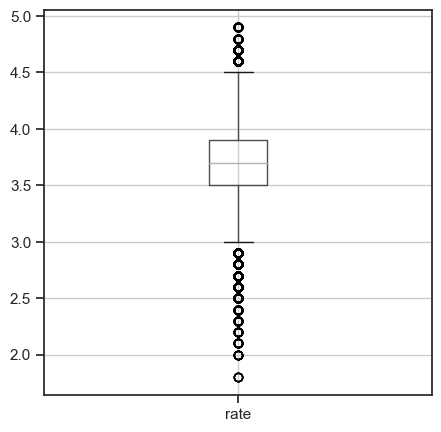

In [586]:
df_num.boxplot(column=['rate'])
plt.show()

#### Creating a boxplot for `votes` column

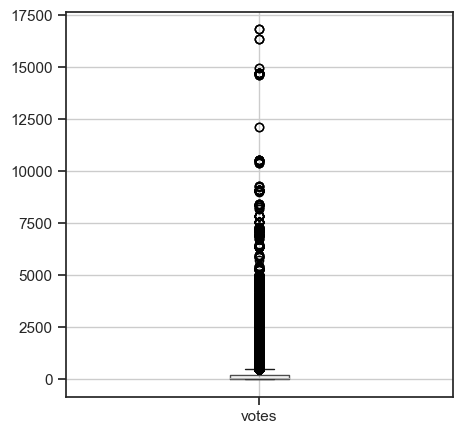

In [587]:
df_num.boxplot(column=['votes'])
plt.show()

#### Creating a boxplot for `Cost_for_two` column

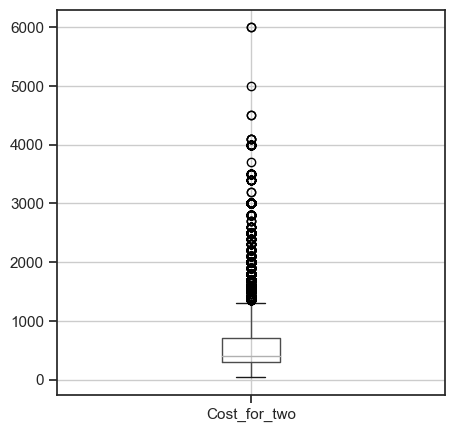

In [588]:
df_num.boxplot(column=['Cost_for_two'])
plt.show()

**Observations:**

From the above plots, we notice that for all the variables there are points above the upper extreme and below the lower extreme. These points are outliers.

<a id='remove_outliers'></a>
## 7.3 Removing outliers using IQR method

#### Calculating interquartile range 

In [589]:
Q1 = df_num.drop(['rate'], axis=1).quantile(0.25)
Q3 = df_num.drop(['rate'], axis=1).quantile(0.75)

IQR = Q3 - Q1


# Printing the IQR values for numeric variables

print(IQR)

votes           192.0
Cost_for_two    400.0
dtype: float64


#### Filtering out the outlier values

In [590]:
df = df[~((df < (Q1 - 3 * IQR)) | (df > (Q3 + 3 * IQR))).any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed.

#### Checking the shape of data

In [591]:
df.shape

(45634, 10)

<a id='clean_data_check'></a>
# 8. Checking cleaned data

In [592]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost_for_two,Type_of_service
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Others,Casual Dining,Others,800.0,Buffet


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45634 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             45634 non-null  object 
 1   online_order     45634 non-null  object 
 2   book_table       45634 non-null  object 
 3   rate             45634 non-null  float64
 4   votes            45634 non-null  int64  
 5   location         45634 non-null  object 
 6   rest_type        45634 non-null  object 
 7   cuisines         45634 non-null  object 
 8   Cost_for_two     45634 non-null  float64
 9   Type_of_service  45634 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.8+ MB


**Observations:**

There are **45634** rows and **10** columns in our cleaned dataset.

**`rate`** and **`Cost_for_two`** column data types have been changed to **float** and there are no missing values present.

<a id='correlation'></a>
## 8.1 Checking correlation between features

In [594]:
df.corr()

,rate,votes,Cost_for_two
rate,1.000000,0.394429,0.201677
votes,0.394429,1.000000,0.419145
Cost_for_two,0.201677,0.419145,1.000000


**Observations:**

1. **`rate`** and **`votes`** columns are moderately correlated which indicates that restaurants with more no. of ratings have higher votes.

2. The correlation coefficient between **`votes`** and **`Cost_for_two`** is **0.419145**, indicating a positive but moderate correlation between the two variables.

<a id='multicollinearity'></a>
## 8.2 Checking multicollinearity between features

#### Selecting the predictor variables for VIF (Variance Inflation Factor) analysis

VIF is a measure of multicollinearity, which assesses how much the variance of the estimated regression coefficients is increased due to multicollinearity among the independent variables.

In [595]:
predictors = df_num

#### Adding a constant term to the predictors

In [596]:
predictors = sm.add_constant(predictors)

#### Calculating VIF for each predictor

In [597]:
vif = pd.DataFrame()
vif["Variable"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]


# Print the VIF values

print(vif)

       Variable         VIF
0         const  106.781158
1          rate    1.301208
2         votes    1.318486
3  Cost_for_two    1.242699


**Observations:**

1. The **constant term (const)** has a VIF of **106.781158**, which indicates a **very high level** of multicollinearity. However, this is expected because the constant term is **artificially added** in the model.
2. We can see that since the VIF value for all the three variables is low, there is no multicollinearity in the data.

<a id='visualization'></a>
# 9. Visualizations

<a id='univariate'></a>
## 9.1 Univariate Analysis

<a id='visualize_locations'></a>
### 9.1.1 Visualizing `Locations`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HSR'),
  Text(3, 0, 'JP Nagar'),
  Text(4, 0, 'Whitefield'),
  Text(5, 0, 'Koramangala 5th Block'),
  Text(6, 0, 'Jayanagar'),
  Text(7, 0, 'Marathahalli'),
  Text(8, 0, 'Indiranagar'),
  Text(9, 0, 'Bannerghatta Road'),
  Text(10, 0, 'Electronic City'),
  Text(11, 0, 'Bellandur'),
  Text(12, 0, 'Koramangala 1st Block'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'Koramangala 7th Block'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Koramangala 6th Block'),
  Text(17, 0, 'Banashankari'),
  Text(18, 0, 'Ulsoor'),
  Text(19, 0, 'Koramangala 4th Block'),
  Text(20, 0, 'Kalyan Nagar'),
  Text(21, 0, 'Richmond Road'),
  Text(22, 0, 'Frazer Town'),
  Text(23, 0, 'Basavanagudi'),
  Text(24, 0, 'Banaswadi'),
  Text(25, 0, 'Malleshwaram'),
  

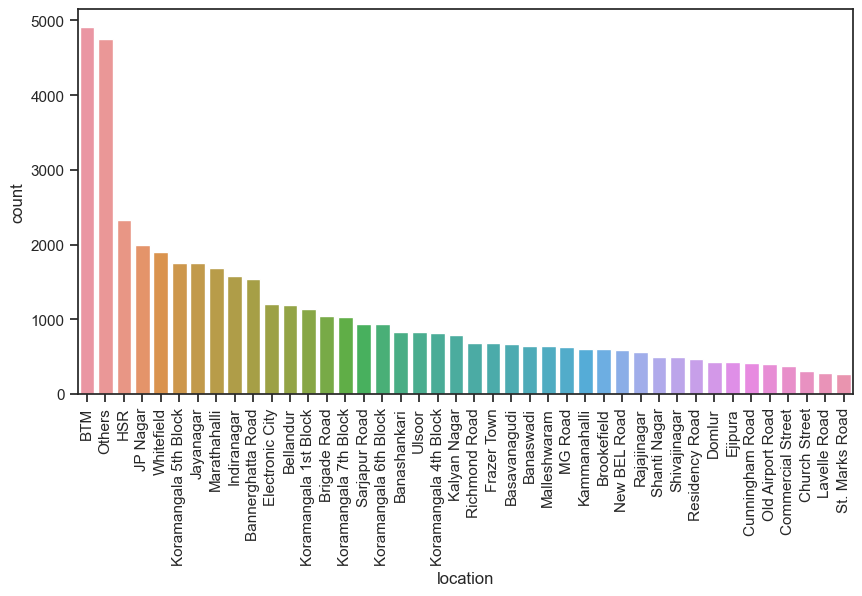

In [598]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df.location, order=df.location.value_counts(ascending = False).index)
plt.xticks(rotation = 90)

**Observations:**

1. After analyzing the data, it becomes evident that **BTM** is the location with the **highest number of restaurants**. Consequently, it is advisable to explore alternative locations when considering opening a new restaurant. Due to the intense competition in BTM, launching a restaurant there may pose higher risks compared to other areas.

2. To **minimize risk and tap into a market with both demand and less competition**, it is **recommended to consider mid-range locations** for the new restaurant venture. These locations are likely to **offer a balance between customer demand and a relatively less saturated market**, providing a safer entry point for a new restaurant business.

<a id='visualize_online_order'></a>
### 9.1.2 Visualizing `online_order`

Yes    27122
No     18512
Name: online_order, dtype: int64


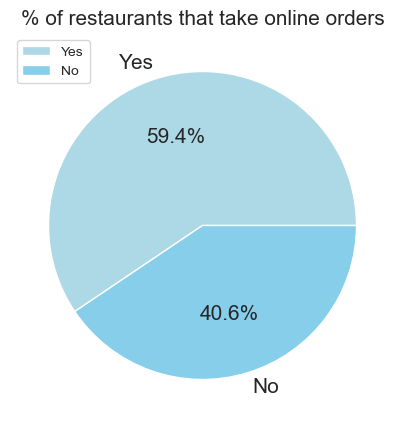

In [599]:
print(df['online_order'].value_counts())
plt.figure(figsize=(5,5))
df['online_order'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=15)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10});

**Observation:**

Here we can see that almost **59.4%** of the restaurants have the facility for online ordering.

<a id='visualize_book_table'></a>
### 9.1.3 Visualizing `book_table`

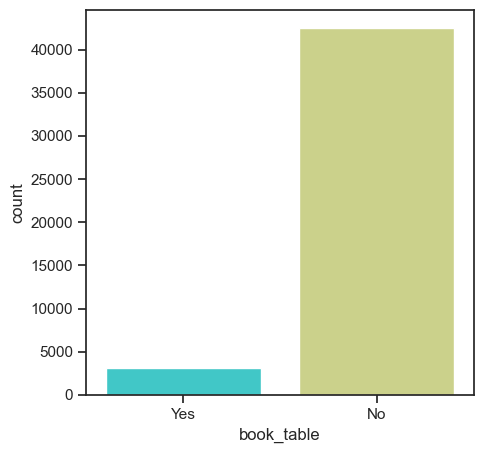

In [600]:
plt.figure(figsize = (5,5))
sns.countplot(df.book_table , palette = 'rainbow');

**Observation:**

Here we can see that majority of the restaurants do not require prior booking of a table.

<a id='visualize_cuisines'></a>
### 9.1.4 Visualizing `cuisines`

In [601]:
values = df['cuisines'].value_counts()[1:6] # starting with 1 to remove 'Others'
labels = values.index
text = values.index
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = .5)])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 15)
fig.update_layout(title = "Top 5 popular cuisines of Bangalore", titlefont={'size': 30})
fig.show()

**Observation:**

The data suggests that the most popular cuisines in Bangalore are **North Indian, Chinese, South Indian, Biryani** and **Bakery/Desserts**.

<a id='visualize_rate'></a>
### 9.1.5 Visualizing `rate`

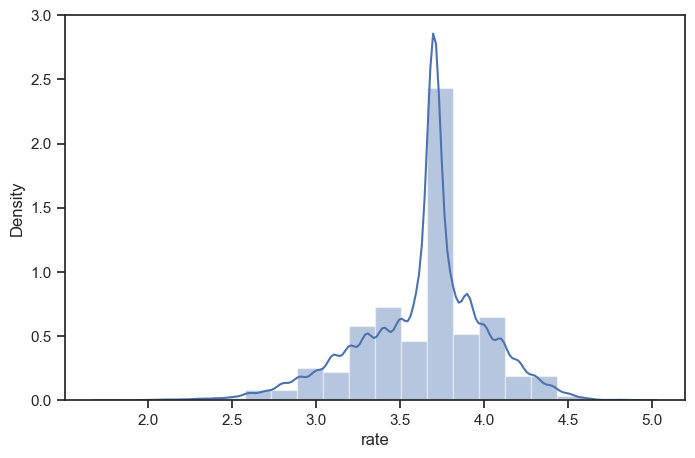

In [602]:
plt.figure(figsize=(8,5))
sns.distplot(df['rate'], bins=20);

**Observation:**

It can be observed that the majority of ratings fall between **3.5** and **4.0**.

<a id='visualize_Type_of_service'></a>
### 9.1.6 Visualizing `Type_of_service`

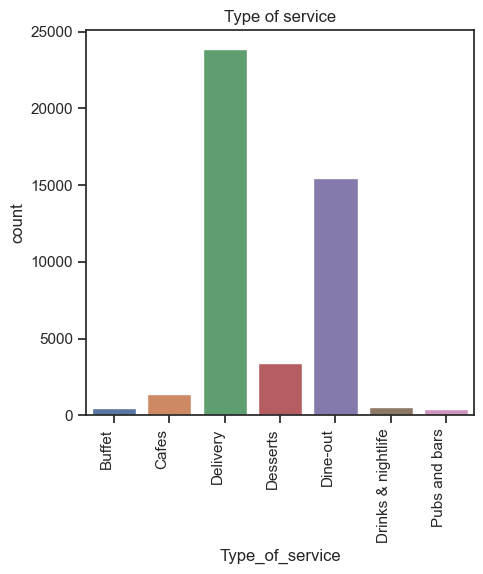

In [603]:
sns.countplot(df['Type_of_service']).set_xticklabels(sns.countplot(df['Type_of_service']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Type of service');

**Observation:**

The two primary service types available are **Delivery** and **Dine-out**.

<a id='visualize_Cost_for_two'></a>
### 9.1.7 Visualizing `Cost_for_two`

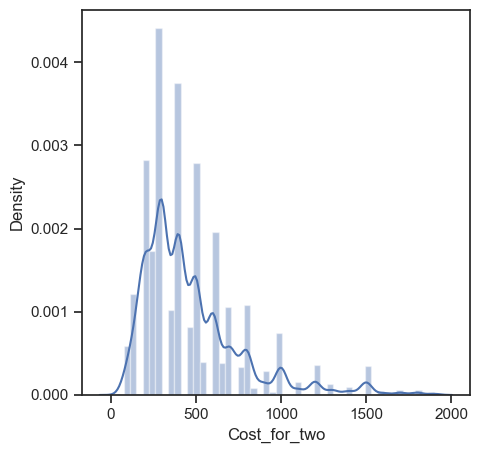

In [604]:
plt.figure(figsize=(5,5))
sns.distplot(df['Cost_for_two'])
plt.show()

**Observation:**

It is seen that majority of the restaurants have an average cost for two of 250.

<a id='bivariate'></a>
## 9.2 Bivariate Analysis

<a id='visualize_online_order_rate'></a>
### 9.2.1 Visualizing `online_order` v/s `rate`

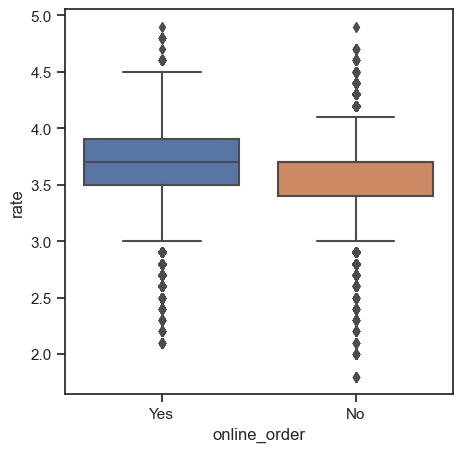

In [605]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'online_order', y = 'rate', data = df);

**Observation:**

Restaurants that offer online ordering tend to have higher ratings.

<a id='visualize_book_table_rate'></a>
### 9.2.2 Visualizing `book_table` v/s `rate`

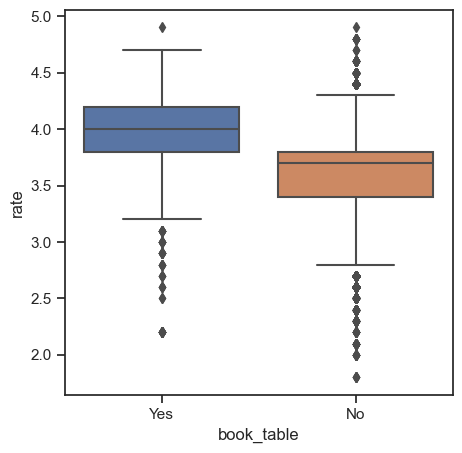

In [606]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'book_table', y = 'rate', data = df);

**Observation:**

Restaurants that offer table booking tend to have higher ratings.

<a id='visualize_type_of_service_rate'></a>
### 9.2.3 Visualizing `Type_of_service` vs `rate`

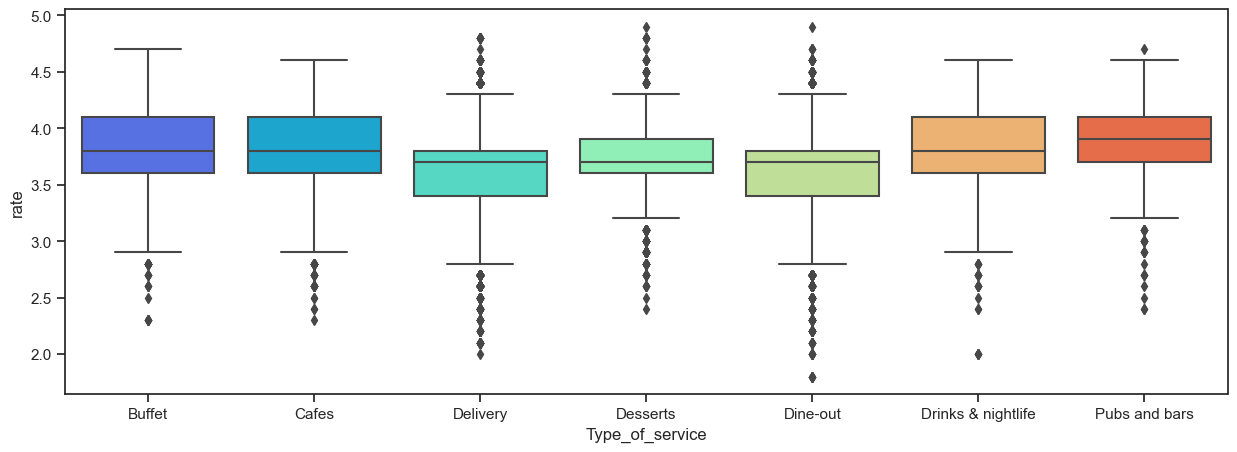

In [607]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Type_of_service', y = 'rate', data = df, palette = "rainbow");

**Observation:**

Restaurants that offer **'Buffet', 'Cafes', 'Drinks & nightlife'** and **'Pubs and bars'** tend to have higher ratings compared to those without these features.

<a id='visualize_three'></a>
### 9.2.4 Visualizing `Cost_for_two` v/s `votes` v/s `rate` using pair plot

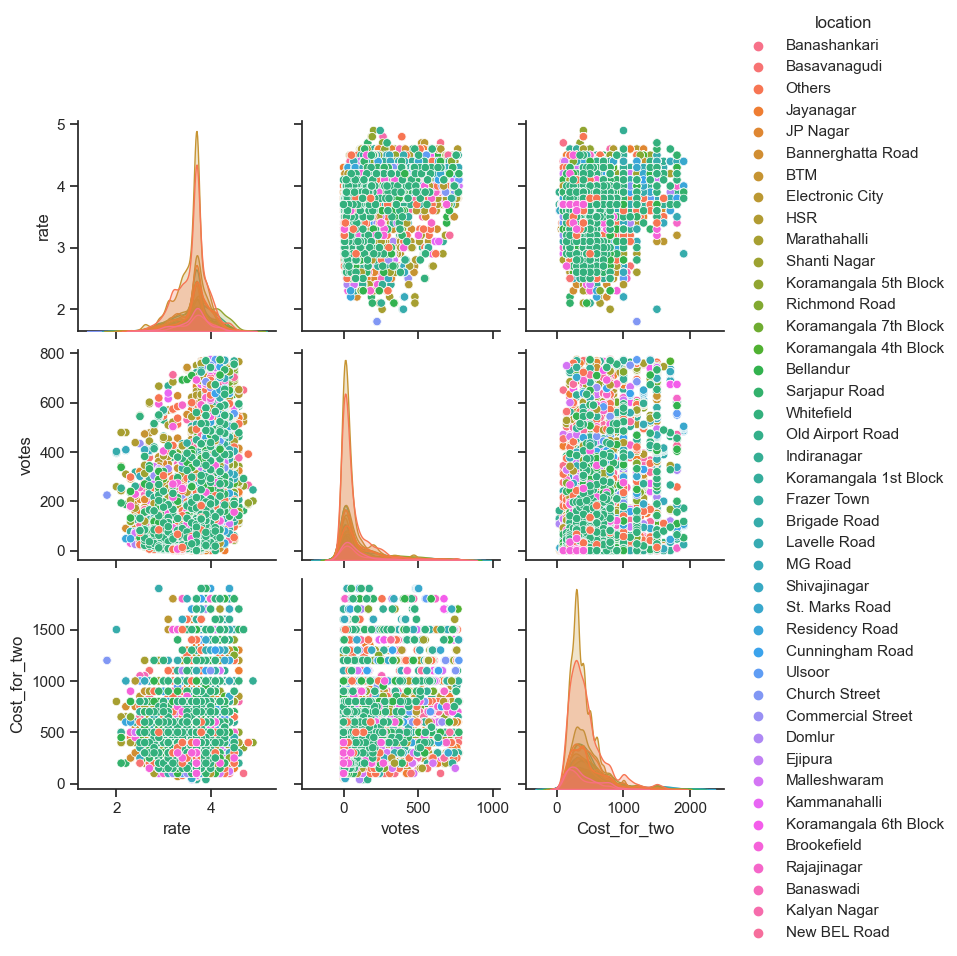

In [608]:
sns.set(style="ticks")
sns.pairplot(df, hue="location", palette="husl")
plt.show()

**Observation:**

The diagonal plots display the individual distributions of each variable, and it appears that the majority of them exhibit a shape that resembles a normal distribution.

<a id='visualize_correlation'></a>
## 9.3 Visualizing correlation between features

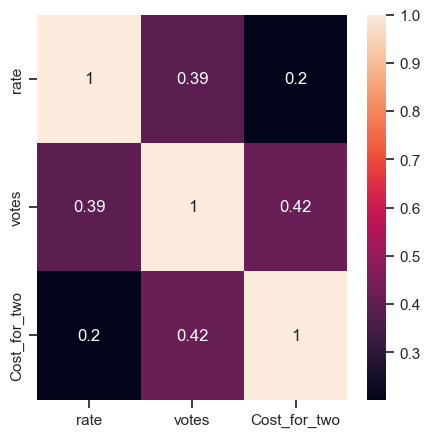

In [609]:
sns.heatmap(df.corr(), annot=True);

**Observation:**

Based on the correlation table, there is no column that stands out as having a very high correlation with any other column, so there is no immediate need to delete any column based on correlation.

<a id='analysis'></a>
# 10. Analysis

<a id='analysis_1'></a>
## 10.1 How many restaurants have online ordering facility in each location?

In [610]:
df1 = df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values = None, index = ['location'], columns = ['online_order'])
df1

name      
online_order             No   Yes
location                         
BTM                    1741  3165
Banashankari            379   457
Banaswadi               302   338
Bannerghatta Road       674   870
Basavanagudi            231   436
Bellandur               506   691
Brigade Road            479   561
Brookefield             229   379
Church Street           136   179
Commercial Street       228   142
Cunningham Road         162   257
Domlur                  212   221
Ejipura                 214   219
Electronic City         658   545
Frazer Town             287   396
HSR                     556  1771
Indiranagar             527  1053
JP Nagar                835  1164
Jayanagar               530  1219
Kalyan Nagar            327   460
Kammanahalli            263   347
Koramangala 1st Block   359   783
Koramangala 4th Block   352   468
Koramangala 5th Block   562  1196
Koramangala 6th Block   378   554
Koramangala 7th Block   358   673
Lavelle Road            188    89
MG Road                 357   268
Malleshwaram            272   366
Marathahalli            648  1038
New BEL Road            231   364
Old Airport Road        189   208
Others                 1938  2814
Rajajinagar             265   299
Residency Road          257   208
Richmond Road           449   235
Sarjapur Road           292   643
Shanti Nagar            283   219
Shivajinagar            354   144
St. Marks Road          144   119
Ulsoor                  268   558
Whitefield              892  1006

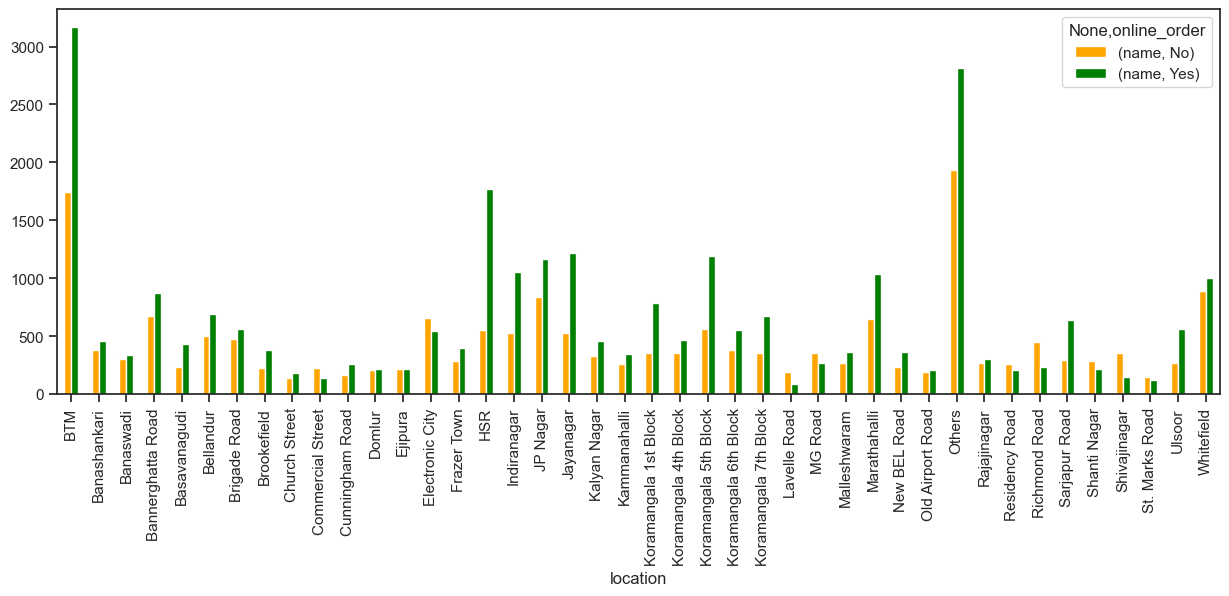

In [611]:
df1.plot(kind='bar', figsize=(15,5), color = ['orange', 'green']);

**Orange line** indicates the restaurants which are **not providing online facility**. 

**Green line** indicates the restaurants which are **providing online facility**.

<a id='analysis_2'></a>
## 10.2 How many restaurants have table booking facility in each location?

In [612]:
df2 = df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values = None, index = ['location'], columns = ['book_table'])
df2

name       
book_table                 No    Yes
location                            
BTM                    4818.0   88.0
Banashankari            794.0   42.0
Banaswadi               632.0    8.0
Bannerghatta Road      1498.0   46.0
Basavanagudi            661.0    6.0
Bellandur              1143.0   54.0
Brigade Road            941.0   99.0
Brookefield             554.0   54.0
Church Street           260.0   55.0
Commercial Street       370.0    NaN
Cunningham Road         315.0  104.0
Domlur                  413.0   20.0
Ejipura                 433.0    NaN
Electronic City        1139.0   64.0
Frazer Town             680.0    3.0
HSR                    2188.0  139.0
Indiranagar            1386.0  194.0
JP Nagar               1854.0  145.0
Jayanagar              1577.0  172.0
Kalyan Nagar            682.0  105.0
Kammanahalli            580.0   30.0
Koramangala 1st Block  1142.0    NaN
Koramangala 4th Block   649.0  171.0
Koramangala 5th Block  1481.0  277.0
Koramangala 6th Block   889.0   43.0
Koramangala 7th Block   931.0  100.0
Lavelle Road            201.0   76.0
MG Road                 472.0  153.0
Malleshwaram            600.0   38.0
Marathahalli           1613.0   73.0
New BEL Road            566.0   29.0
Old Airport Road        370.0   27.0
Others                 4524.0  228.0
Rajajinagar             543.0   21.0
Residency Road          428.0   37.0
Richmond Road           612.0   72.0
Sarjapur Road           866.0   69.0
Shanti Nagar            445.0   57.0
Shivajinagar            475.0   23.0
St. Marks Road          188.0   75.0
Ulsoor                  775.0   51.0
Whitefield             1773.0  125.0

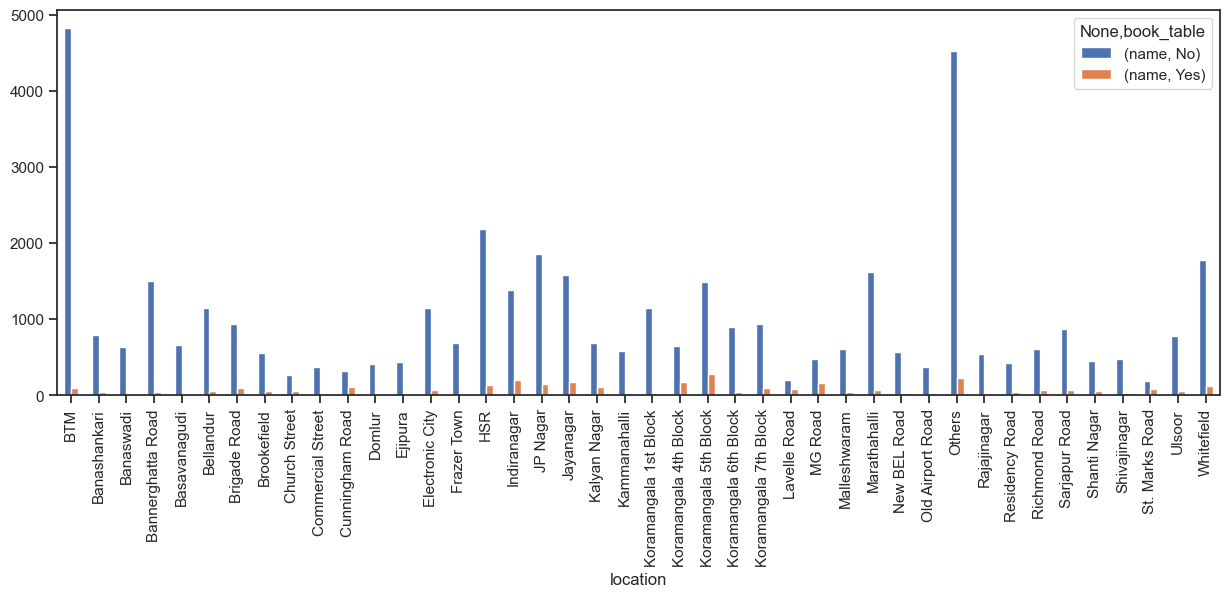

In [613]:
df2.plot(kind='bar', figsize=(15,5));

**Blue line** indicates the restaurants which are **not providing table booking facility**.

**Orange line** indicates the restaurants which are **providing table booking facility**.

<a id='analysis_3'></a>
## 10.3 Grouping different type of restaurants location wise

In [614]:
df3 = df.groupby(['location', 'Type_of_service'])['name'].count()
df3.to_csv('location_type.csv')
df3 = pd.read_csv('location_type.csv')
df3 = pd.pivot_table(df3, values = None, index = ['location'], columns = ['Type_of_service'])
df3

name                                    \
Type_of_service       Buffet  Cafes Delivery Desserts Dine-out   
location                                                         
BTM                     13.0   79.0   2968.0    196.0   1615.0   
Banashankari             3.0   33.0    390.0     66.0    334.0   
Banaswadi                NaN   24.0    310.0     37.0    262.0   
Bannerghatta Road        2.0   46.0    801.0    137.0    556.0   
Basavanagudi             7.0   10.0    342.0     66.0    240.0   
Bellandur               19.0   36.0    593.0     73.0    458.0   
Brigade Road            20.0   46.0    445.0     98.0    392.0   
Brookefield              1.0   14.0    322.0     41.0    228.0   
Church Street            NaN   21.0    122.0     24.0    124.0   
Commercial Street        NaN   13.0    121.0     77.0    159.0   
Cunningham Road         29.0   22.0    174.0     20.0    161.0   
Domlur                  13.0    9.0    245.0     33.0    121.0   
Ejipura                  NaN    NaN    245.0     16.0    172.0   
Electronic City         16.0   23.0    559.0     70.0    498.0   
Frazer Town              NaN   11.0    446.0     56.0    166.0   
HSR                     12.0   41.0   1601.0    116.0    539.0   
Indiranagar             10.0   76.0    931.0    122.0    396.0   
JP Nagar                32.0   70.0   1069.0    166.0    635.0   
Jayanagar               17.0   70.0    957.0    175.0    523.0   
Kalyan Nagar             5.0   43.0    348.0     88.0    291.0   
Kammanahalli             1.0   23.0    316.0     35.0    229.0   
Koramangala 1st Block    NaN   14.0    683.0     61.0    369.0   
Koramangala 4th Block   13.0   35.0    405.0     75.0    235.0   
Koramangala 5th Block   15.0   91.0    851.0    181.0    570.0   
Koramangala 6th Block    9.0   33.0    443.0     62.0    337.0   
Koramangala 7th Block   25.0   44.0    458.0    121.0    362.0   
Lavelle Road            20.0   22.0     70.0     45.0     82.0   
MG Road                 22.0   59.0    216.0     63.0    213.0   
Malleshwaram             2.0   31.0    247.0     85.0    254.0   
Marathahalli            17.0   31.0    941.0    102.0    585.0   
New BEL Road             2.0   23.0    324.0     32.0    209.0   
Old Airport Road         6.0    5.0    196.0     35.0    142.0   
Others                  63.0  114.0   2750.0    276.0   1457.0   
Rajajinagar              7.0    4.0    253.0     53.0    241.0   
Residency Road           5.0   26.0    155.0     48.0    182.0   
Richmond Road           44.0   21.0    246.0     78.0    291.0   
Sarjapur Road           13.0   20.0    524.0     82.0    284.0   
Shanti Nagar             9.0   22.0    198.0     39.0    228.0   
Shivajinagar             6.0   17.0    143.0     37.0    280.0   
St. Marks Road           5.0    5.0     88.0     10.0    115.0   
Ulsoor                   NaN   48.0    425.0     59.0    264.0   
Whitefield              21.0   42.0    979.0    133.0    683.0   

                                                        
Type_of_service       Drinks & nightlife Pubs and bars  
location                                                
BTM                                 18.0          17.0  
Banashankari                        10.0           NaN  
Banaswadi                            6.0           1.0  
Bannerghatta Road                    2.0           NaN  
Basavanagudi                         2.0           NaN  
Bellandur                           10.0           8.0  
Brigade Road                        29.0          10.0  
Brookefield                          2.0           NaN  
Church Street                       15.0           9.0  
Commercial Street                    NaN           NaN  
Cunningham Road                     10.0           3.0  
Domlur                               4.0           8.0  
Ejipura                              NaN           NaN  
Electronic City                     18.0          19.0  
Frazer Town                          2.0           2.0  
HSR                        

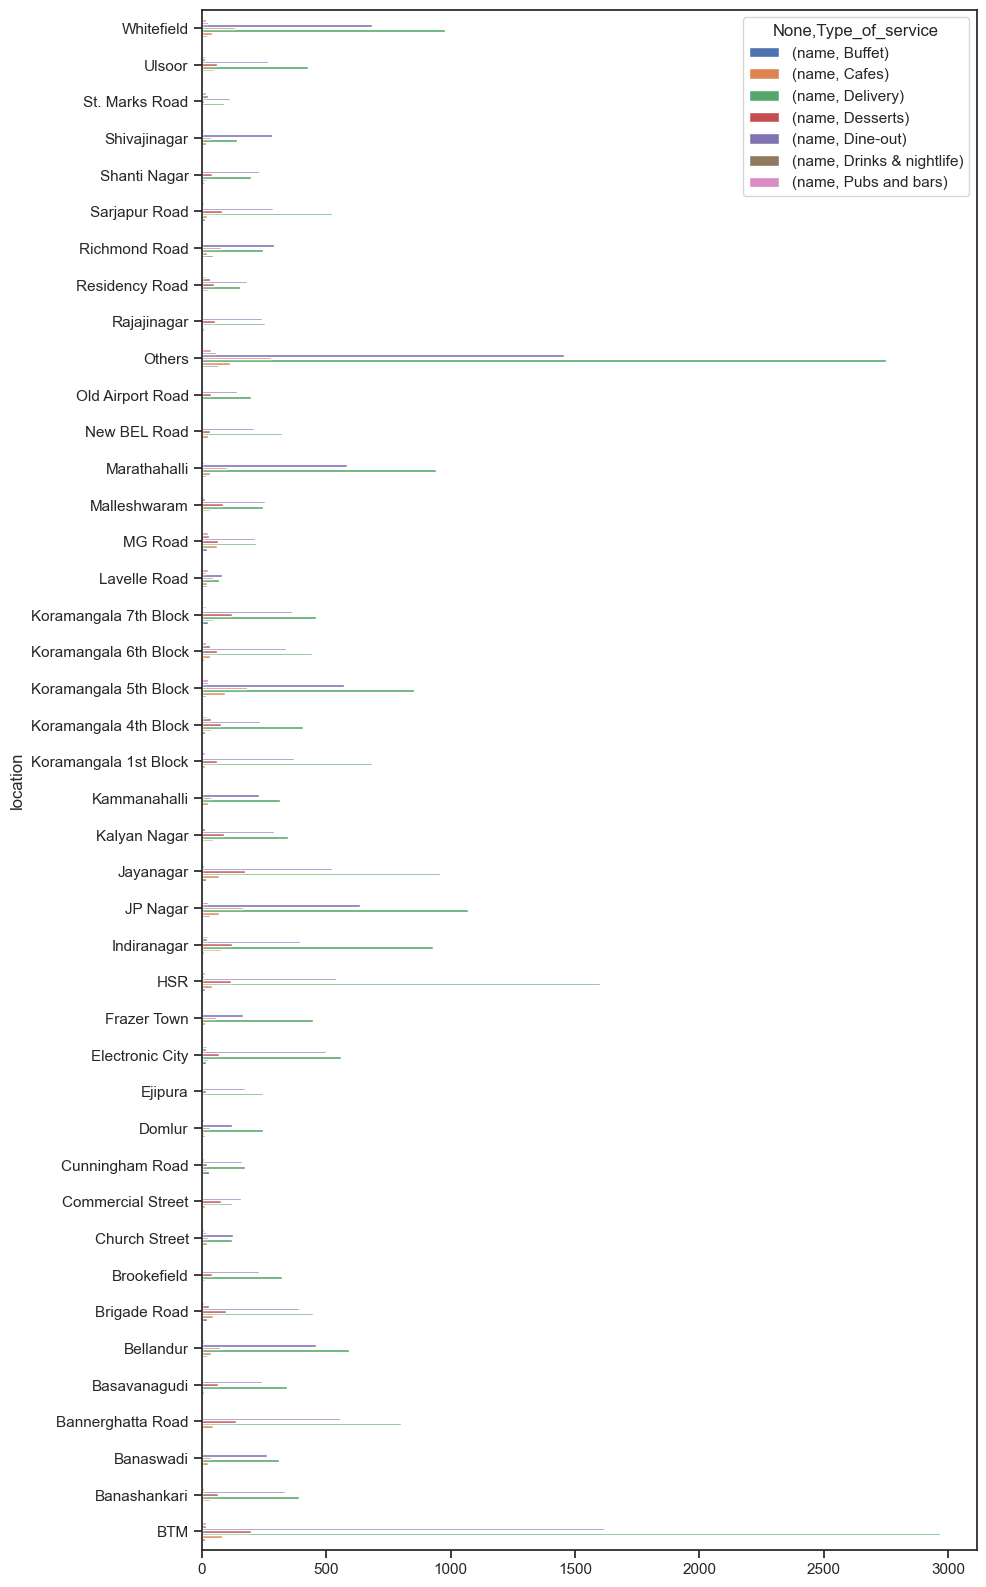

In [615]:
df3.plot(kind='barh', figsize=(10,20));

<a id='analysis_4'></a>
## 10.4 Finding no. of votes location wise

In [616]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()

df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending = False)
df5.head()

,votes
location,
Others,370119
BTM,328790
Koramangala 5th Block,283734
HSR,253219
Indiranagar,242614


#### Dropping the 'Others' value

In [617]:
df5 = df5.iloc[1:, :]
df5.head()

,votes
location,
BTM,328790
Koramangala 5th Block,283734
HSR,253219
Indiranagar,242614
Jayanagar,221925


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'Koramangala 5th Block'),
  Text(2, 0, 'HSR'),
  Text(3, 0, 'Indiranagar'),
  Text(4, 0, 'Jayanagar'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Koramangala 7th Block'),
  Text(7, 0, 'Whitefield'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'Koramangala 6th Block'),
  Text(10, 0, 'Koramangala 4th Block'),
  Text(11, 0, 'Bannerghatta Road'),
  Text(12, 0, 'Kalyan Nagar'),
  Text(13, 0, 'Bellandur'),
  Text(14, 0, 'Cunningham Road'),
  Text(15, 0, 'Banashankari'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'MG Road'),
  Text(18, 0, 'Brigade Road'),
  Text(19, 0, 'Malleshwaram'),
  Text(20, 0, 'Ulsoor'),
  Text(21, 0, 'Sarjapur Road'),
  Text(22, 0, 'New BEL Road'),
  Text(23, 0, 'Electronic City'),
  Text(24, 0, 'Basavanagudi'),
  Text(25, 0, 'Brookefield'),


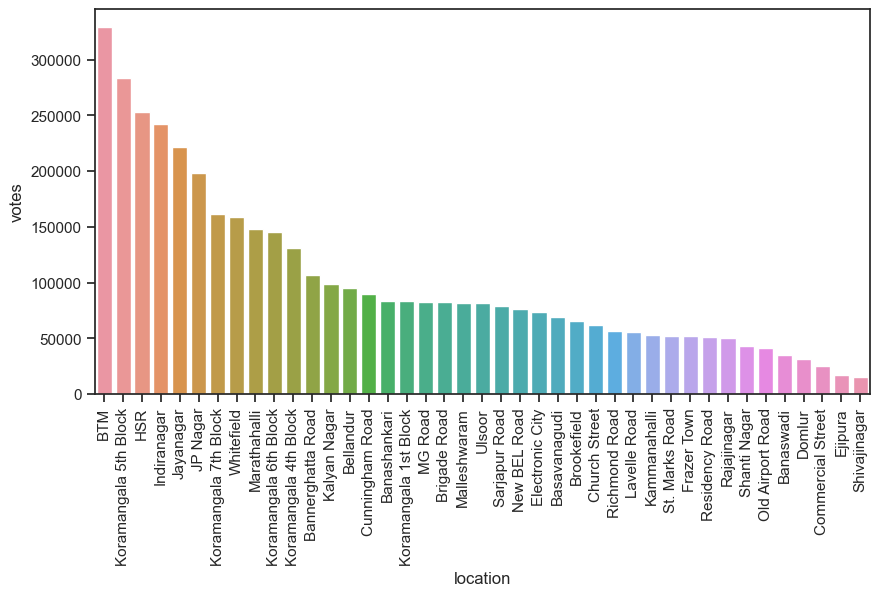

In [618]:
plt.figure(figsize = (10,5))
sns.barplot(df5.index, df5['votes'])
plt.xticks(rotation = 90)

**Observation:**

Restaurants located in **BTM** have received the highest number of votes compared to those in other locations.

<a id='analysis_5'></a>
## 10.5 Finding no. of votes cuisines wise

In [619]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()

df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending = False)
df7.head()

,votes
cuisines,
Others,2781389
North Indian,239455
"North Indian, Chinese",178826
South Indian,85380
"South Indian, North Indian, Chinese",48811


#### Dropping the 'Others' value

In [620]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,239455
"North Indian, Chinese",178826
South Indian,85380
"South Indian, North Indian, Chinese",48811
Cafe,45814


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'South Indian, North Indian, Chinese'),
  Text(4, 0, 'Cafe'),
  Text(5, 0, 'Ice Cream, Desserts'),
  Text(6, 0, 'Desserts, Beverages'),
  Text(7, 0, 'Biryani'),
  Text(8, 0, 'Burger, Fast Food'),
  Text(9, 0, 'Desserts'),
  Text(10, 0, 'Pizza, Fast Food'),
  Text(11, 0, 'Bakery, Desserts'),
  Text(12, 0, 'Chinese, Momos'),
  Text(13, 0, 'Cafe, Desserts'),
  Text(14, 0, 'Chinese, Thai'),
  Text(15, 0, 'Chinese'),
  Text(16, 0, 'South Indian, North Indian, Chinese, Street Food'),
  Text(17, 0, 'North Indian, Chinese, Biryani'),
  Text(18, 0, 'Fast Food'),
  Text(19,

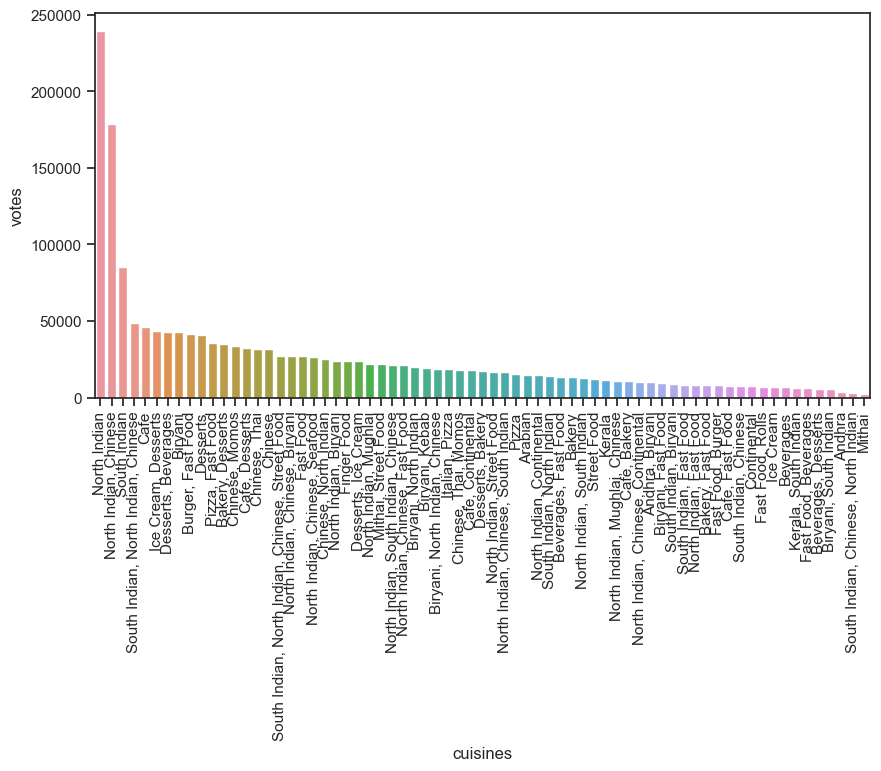

In [621]:
plt.figure(figsize = (10,5))
sns.barplot(df7.index, df7['votes'])
plt.xticks(rotation = 90)

**Observation:**

Restaurants serving **North Indian** cuisine have received the highest number of votes compared to other cuisines.

<a id='conclusion'></a>
# 11. Inferences and Conclusion

This dataset can be utilized to address the following problem statements and provide valuable insights for individuals planning to start a new food business:

1. **Location Analysis**: By analyzing the data, potential business owners can identify favorable locations for starting a new restaurant or small food business. They can consider factors such as the popularity of existing restaurants, customer ratings, and the availability of various cuisines in different locations.

2. **Restaurant Recommendation**: A recommendation system can be developed using this dataset to suggest restaurants to users based on their preferences. Factors such as cuisine type, location, average cost, and ratings can be considered to provide personalized recommendations.

3. **Rating Prediction**: It is possible to build a model that predicts restaurant ratings based on their features. This prediction model can help business owners understand the potential ratings of their establishment and make improvements accordingly.

4. **Sentiment Analysis**: By performing sentiment analysis on user reviews, it is possible to gain insights into the sentiments associated with different restaurants. This analysis can identify positive or negative trends, enabling business owners to address customer feedback and enhance their services.

In summary, the dataset offers opportunities for location analysis, restaurant recommendation, rating prediction, and sentiment analysis. **These insights can greatly benefit individuals planning to enter the food business and assist them in making informed decisions.**